<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Implementa%C3%A7%C3%A3o-Algoritmos/Apresenta%C3%A7%C3%A3o_PID_Implementa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Não-Supervisionado

"*O aprendizado não supervisionado é um ramo do Machine Learning que aprende com dados de teste que não foram rotulados, classificados ou categorizados previamente. Em vez de responder à programação de um operador, o aprendizado não supervisionado identifica semelhanças nos dados e reage com base na presença ou ausência de tais semelhanças em cada novo dado*

**Essa abordagem de Aprendizado de Máquina é útil quando não possuímos rótulos (Labels) para os nossos dados. Isto é importante pelo fato de que em muitos contexos possuir esses dados pode ser difícil e/ou custoso.**


Nesse caso de estudo, pelo fato da base de dados ser atual, real e ter sido coletada em um contexto de uma rede social, não se faz possível possuir rótulos para a classificação de textos. Dessa forma, objetiva-se agrupar os dados de forma não supervisionada.

# Clustering

**Clustering é uma técnica de Aprendizado de Máquina que envolve o agrupamento de pontos de dados.**

Utiliza-se algoritmos de clustering para agrupar pontos de dados em grupos específicos, cujos, na teoria devem possuir propriedades/características semelhantes.

**K-Means**

K-Means é um método de Clustering que tem como objetivo o particionamento de n observações dentre k grupos, onde cada observação pertence ao grupo mais próximo da média.


A execução do K-Means segue um conjunto de passos, descritos abaixo:

1. Selecionar um número de classes/grupos para utilizar e inicializarmos aleatoriamente seus respectivos pontos centrais (Centróides). Esses grupos podem ser definidos de acordo com a regra do negócio ou a perspectiva do problema.
2. Cada de ponto de dados é classificado, baseando-se na distância entre esse ponto e o centro do grupo.
3. Com base nos pontos classificados, recalcula-se o centróide, a partir da média das distâncias de todos os vetores do grupo.  

Esses dois últimos passos são repetidos, até que o limite de iterações pré-determinado seja atingido, ou quando os centróides não sofrerem alterações significantes de uma iteração para outra.



**Vantagens:**

- É rápido, visto que o que é feito é somente calcular as distâncias entre os pontos e os centróides do grupo. Possui então complexidade linear O(n). 

- É simples de aplicar e se mostra eficiente.

**Desvantagens:**

- Dificuldade para determinar a quantidade de clusters (Dependendo do Objetivo).

- Pode ser inconsistente, a depende do conjunto de dados.

# Importando Bibliotecas, Módulos e Dados

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import spacy  
import nltk
nltk.download('stopwords')
import re  
from collections import defaultdict 
import logging 
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
#Criando Data Frame a partir dos dados.
data = pd.read_csv('dados-pesquisa.csv')
data = data[['created_at', 'text', 'lang']]

# Visualizando e Explorando os dados

In [78]:
#Visualizando as 5 primeiras linhas.
data.head()

,created_at,text,lang
0,Mon May 18 17:53:01 +0000 2020,"Tudo mudou na nossa forma de trabalhar, mas na...",pt
1,Mon May 18 17:52:17 +0000 2020,McDonald’s já reabriu lojas ao público https:/...,pt
2,Mon May 18 17:50:40 +0000 2020,"Sindicato, está atento em tudo o que envolve s...",pt
3,Mon May 18 17:49:17 +0000 2020,Nossos problemas da saúde definitivamente acab...,pt
4,Mon May 18 17:49:06 +0000 2020,Fábricas de todo o mundo se viram obrigadas a ...,pt


In [79]:
#Visualizando as 5 últimas linhas.
data.tail()

,created_at,text,lang
109959,Mon Jul 20 15:04:14 +0000 2020,porto alegre perigando a entrar em lockdown e ...,pt
109960,Mon Jul 20 15:03:35 +0000 2020,"Nunca que a Mídia vai falar isso!\nAMB, CFM e ...",pt
109961,Mon Jul 20 15:03:33 +0000 2020,@joaopiresrj Eu não sou cientista mas esse LOC...,pt
109962,Mon Jul 20 15:01:54 +0000 2020,Q&amp;A - Recessão ou Lockdown. O que é pior? ...,pt
109963,Mon Jul 20 15:01:38 +0000 2020,O prefeito de Los Angeles está preste a decret...,pt


In [80]:
#Verificando a estrutura inicial dos dados.
data.shape

(109964, 3)

**Podemos observar aproximadamente 110 mil linhas e 6 colunas.**

# Pré-Processando os dados

In [81]:
#Removendo dados duplicados na coluna de Texto e substituindo dentro do próprio Data Frame.
data.drop_duplicates(['text'], inplace=True)

In [82]:
#Verificando novamente a estrutura dos dados para observar a quantidade de dados únicos.
data.shape

(103364, 3)

6600 linhas foram removidas.

**Iremos trabalhar com os Dados de Texto, por isso, selecionaremos apenas a coluna associada ao conteúdo dos tweets.**

In [83]:
#Utilizando notação comum em estudos de Aprendizado de Máquina.
X = data['text']

In [84]:
#Visualizando as 15 primeiras linhas. 
X[:15]

0     Tudo mudou na nossa forma de trabalhar, mas na...
1     McDonald’s já reabriu lojas ao público https:/...
2     Sindicato, está atento em tudo o que envolve s...
3     Nossos problemas da saúde definitivamente acab...
4     Fábricas de todo o mundo se viram obrigadas a ...
5     @g1 @RedeGlobo @jornalhoje o governo de @jairb...
6     Lei N° 6666, nos #EUA, que pretende traçar e i...
7     https://t.co/mcftUwJr5F o governo precisa ser ...
8     Blockchain: a tecnologia que popularizou o #bi...
9     VOCÊS CONHECEM ALGUM PAÍS ALÉM DO BRASIL QUE T...
10    Itajuípe recebe o Centro Municipal de Isolamen...
11    📣 NOTÍCIA / NEWS / NOUVELLES \n\n🇵🇹 Manual de ...
12    Enquanto o governo Bolsonaro permanecer Irresp...
13    Faça a diferença! Seja um doador sem fronteira...
14    Manaus, maio de 2020. Reportagem sobre o colap...
Name: text, dtype: object

**Devido ao fato de os dados serem proveninentes de uma rede social, se faz necessária uma etapa de pré-processamento nos mesmos.**

In [85]:
def Preprocessing_data(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '').replace('(', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

**Função que remove links, urls, sinais de pontuação, padroniza os caracteres como minúsculos e remove as stopwords através de um dos módulos da biblioteca NLTK.**

In [86]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [87]:
#remove_emoji('📣 notícia / news / nouvelles 🇵🇹 manual boas práticas – algarve clean &amp safe 🇬🇧 good practice guide')

In [88]:
#Aplicando a função na nossa base de dados.
X = [Preprocessing_data(i) for i in X]

In [89]:
X = [remove_emoji(i) for i in X]

In [90]:
#Visualizando novamente as 15 primeiras linhas, agora após o pré-processamento.
X[:15]

['tudo mudou forma trabalhar, nada mudou objetivo informar #jornalismo #imprensa…',
 'mcdonald’s reabriu lojas público #comida #covid19 #mcdonalds',
 'sindicato, atento tudo envolve saúde condições trabalho nessa pandemia #covid @spbancarios',
 'problemas saúde definitivamente acabaram #saude #forabolsonaro #covid',
 'fábricas todo mundo viram obrigadas dispensarem funcionários decorrência #covid19 antes m…',
 '@g1 @redeglobo @jornalhoje governo @jairbolsonaro vai socorrer ninguém vai enrolar! pois minto quer r…',
 'lei n° 6666, #eua, pretende traçar investigar percurso pessoas tivestes contatos, usand…',
 'governo precisa ser responsabilizado #covid #covid19',
 'blockchain tecnologia popularizou #bitcoin sendo testada combate #covid19 sistema capaz de…',
 'conhecem algum país além brasil torcida organizada coronavirus???? #covid #covid19',
 'itajuípe recebe centro municipal isolamento covid19 #covid19 #isolamentosocial #covid @rctitajuipe',
 ' notícia / news / nouvelles  manual boas p

In [91]:
#Criando DataFrame com os dados pré-processados.
data_text = pd.DataFrame(data=X, columns=['text'])

In [92]:
#Visualizando DataFrame.
data_text

,text
0,"tudo mudou forma trabalhar, nada mudou objetiv..."
1,mcdonald’s reabriu lojas público #comida #covi...
2,"sindicato, atento tudo envolve saúde condições..."
3,problemas saúde definitivamente acabaram #saud...
4,fábricas todo mundo viram obrigadas dispensare...
...,...
103359,porto alegre perigando entrar lockdown ônibus ...
103360,"nunca mídia vai falar isso! amb, cfm crms, tod..."
103361,@joaopiresrj cientista lockdown acho q duas se...
103362,q&ampa recessão lockdown pior? | fiique tranqu...


In [93]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
len(data_text['text']) * 0.7

72354.79999999999

In [95]:
import random

data_aux = pd.DataFrame()
data_aux = random.shuffle(data_text['text'])

In [96]:
data_text['text']

0         pesquisadores desenvolvem tecido neutraliza no...
1         hoje andei orla copacabana encontrei grupo “pa...
2         #covid19 aparecida selou nesta semana acordo c...
3         @followtrick_p0p sdv todo mundo @projetonutri ...
4         oms registra 230 mil casos covid19, mundo atin...
                                ...                        
103359    vontade sair soco coronavírus cara chato saía ...
103360    belo trabalho ministério saúde presidente @jai...
103361    @marcelocredetv genocida idiota ignorante veto...
103362       coronavírus faz novo teste continua bolsonaro*
103363    cientistas médicos recomendam congresso eleiçõ...
Name: text, Length: 103364, dtype: object

In [97]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
train_data['text'] = data_text['text'][:72354]
test_data['text'] = data_text['text'][72354:]

In [98]:
train_data

,text
0,pesquisadores desenvolvem tecido neutraliza no...
1,hoje andei orla copacabana encontrei grupo “pa...
2,#covid19 aparecida selou nesta semana acordo c...
3,@followtrick_p0p sdv todo mundo @projetonutri ...
4,"oms registra 230 mil casos covid19, mundo atin..."
...,...
72349,perguntinha sr @marquinhostrad_ motivo campo g...
72350,"ainda aparece notícia, vão tomar cu sério"
72351,idoso 80 anos morre consequência covid19 corum...
72352,pacientes recuperados novo coronavírus podem d...


In [99]:
test_data

,text
72354,jogo educativo informações sobre coronavírus c...
72355,grupo empresários faz abaixoassinado pedindo l...
72356,"#bomdiabrasil ar saiba acontece brasil mundo, ..."
72357,cheio dívidas vamos term lockdown
72358,usar máscara #coisadeviado usar coisa 1716196 ...
...,...
103359,vontade sair soco coronavírus cara chato saía ...
103360,belo trabalho ministério saúde presidente @jai...
103361,@marcelocredetv genocida idiota ignorante veto...
103362,coronavírus faz novo teste continua bolsonaro*


# Transformando os Dados

In [100]:
#Importando módulos do Gensim, biblioteca que auxilia na implementação do Modelo Word2VEC.
from gensim.models.phrases import Phrases, Phraser

In [101]:
#Quebrando as frases por palavra.
sent = [row.split() for row in train_data['text']]

In [102]:
#Visualizando a representação criada acima.
sent

[['pesquisadores',
  'desenvolvem',
  'tecido',
  'neutraliza',
  'novo',
  'coronavírus'],
 ['hoje',
  'andei',
  'orla',
  'copacabana',
  'encontrei',
  'grupo',
  '“patriotários”',
  'defendendo',
  'ornitorrinco',
  'bizarro',
  'ima…'],
 ['#covid19',
  'aparecida',
  'selou',
  'nesta',
  'semana',
  'acordo',
  'cooperação',
  'abr',
  'telecom',
  'p/',
  'ter',
  'acesso',
  'dados',
  'isolamen…'],
 ['@followtrick_p0p',
  'sdv',
  'todo',
  'mundo',
  '@projetonutri',
  'marcos',
  'frederico',
  'vieira',
  'nutricionista',
  'crn9',
  '#projetonutrisdv…'],
 ['oms',
  'registra',
  '230',
  'mil',
  'casos',
  'covid19,',
  'mundo',
  'atinge',
  'novo',
  'recorde',
  'diário',
  'infecções',
  '|',
  'coronavírus',
  '|',
  'g1'],
 ['60',
  'mil',
  'vidas',
  'perdidas',
  'governadores',
  'prefeitos',
  'pensam',
  'flexibilização',
  'pra',
  'entender',
  'tanta',
  'gente…'],
 ['povos',
  'indígenas',
  'isolados,',
  'genocídio',
  'apenas',
  'possibilidade',
  'di

In [103]:
phrases = Phrases(sent, min_count=2, progress_per=1000)

INFO - 19:15:57: collecting all words and their counts
INFO - 19:15:57: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 19:15:57: PROGRESS: at sentence #1000, processed 10044 words and 13458 word types
INFO - 19:15:57: PROGRESS: at sentence #2000, processed 20347 words and 25184 word types
INFO - 19:15:57: PROGRESS: at sentence #3000, processed 30359 words and 35608 word types
INFO - 19:15:57: PROGRESS: at sentence #4000, processed 40465 words and 45523 word types
INFO - 19:15:57: PROGRESS: at sentence #5000, processed 50632 words and 55010 word types
INFO - 19:15:57: PROGRESS: at sentence #6000, processed 60531 words and 64064 word types
INFO - 19:15:57: PROGRESS: at sentence #7000, processed 70622 words and 73073 word types
INFO - 19:15:57: PROGRESS: at sentence #8000, processed 80691 words and 81842 word types
INFO - 19:15:57: PROGRESS: at sentence #9000, processed 90899 words and 90514 word types
INFO - 19:15:57: PROGRESS: at sentence #10000, processed 100816 wo

In [104]:
#Construindo modelo baseado em Bigram, para a detecção de palavras (únicas) que são formadas por outras duas.
#bigram = Phraser(phrases)

In [105]:
sentences = sent

In [106]:
len(sentences)

72354

In [107]:
#Percorrendo os dados e fazendo uma contagem para verificar as palavras mais frequentes da base.
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

90608

In [108]:
#Exibindo as 10 palavras mais frequentes da base de dados.
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['coronavírus',
 'covid19',
 'lockdown',
 'casos',
 'coronavirus',
 'brasil',
 'pra',
 'novo',
 'mortes',
 'contra']

# Criando o Modelo Word2VEC.

In [109]:
#Importando biblioteca e módulo do Gensim, para a implementação do Word2VEC.
import multiprocessing

from gensim.models import Word2Vec

In [110]:
#Função que conta o número de cores da máquina.
cores = multiprocessing.cpu_count()

In [111]:
#Instanciando modelo Word2VEC a partir dos mesmos parâmetros estabelecidos pelo artigo.
w2v_model = Word2Vec(min_count=2,
                     window=4,
                     size=400,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.007, 
                     negative=20,
                     compute_loss = True,
                     workers=cores-1)

In [112]:
#Construindo vocabulário a partir das sentenças.
w2v_model.build_vocab(sentences, progress_per=5000)

INFO - 19:15:59: collecting all words and their counts
INFO - 19:15:59: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 19:15:59: PROGRESS: at sentence #5000, processed 50632 words, keeping 16056 word types
INFO - 19:15:59: PROGRESS: at sentence #10000, processed 100816 words, keeping 25636 word types
INFO - 19:15:59: PROGRESS: at sentence #15000, processed 151469 words, keeping 33367 word types
INFO - 19:15:59: PROGRESS: at sentence #20000, processed 201621 words, keeping 40253 word types
INFO - 19:15:59: PROGRESS: at sentence #25000, processed 251823 words, keeping 46526 word types
INFO - 19:15:59: PROGRESS: at sentence #30000, processed 302288 words, keeping 52248 word types
INFO - 19:15:59: PROGRESS: at sentence #35000, processed 352522 words, keeping 57596 word types
INFO - 19:15:59: PROGRESS: at sentence #40000, processed 402902 words, keeping 62662 word types
INFO - 19:15:59: PROGRESS: at sentence #45000, processed 453042 words, keeping 67475 word types


# Treinando o Modelo Word2VEC

In [113]:
#Treiando modelo Word2VEC.
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=40, report_delay=1)

INFO - 19:16:07: training model with 1 workers on 34803 vocabulary and 400 features, using sg=0 hs=0 sample=1e-05 negative=20 window=4
INFO - 19:16:08: EPOCH 1 - PROGRESS: at 27.40% examples, 74502 words/s, in_qsize 1, out_qsize 0
INFO - 19:16:09: EPOCH 1 - PROGRESS: at 54.86% examples, 74803 words/s, in_qsize 1, out_qsize 0
INFO - 19:16:10: EPOCH 1 - PROGRESS: at 83.65% examples, 75311 words/s, in_qsize 2, out_qsize 0
INFO - 19:16:11: worker thread finished; awaiting finish of 0 more threads
INFO - 19:16:11: EPOCH - 1 : training on 729385 raw words (276163 effective words) took 3.7s, 75527 effective words/s
INFO - 19:16:12: EPOCH 2 - PROGRESS: at 28.79% examples, 79043 words/s, in_qsize 1, out_qsize 0
INFO - 19:16:13: EPOCH 2 - PROGRESS: at 57.61% examples, 77627 words/s, in_qsize 1, out_qsize 0
INFO - 19:16:14: EPOCH 2 - PROGRESS: at 86.37% examples, 77237 words/s, in_qsize 1, out_qsize 0
INFO - 19:16:14: worker thread finished; awaiting finish of 0 more threads
INFO - 19:16:14: EPOC

(11038183, 29175400)

In [114]:
#Tornando o modelo mais eficiente em questões de uso de memória.
w2v_model.init_sims(replace=True)

INFO - 19:18:32: precomputing L2-norms of word weight vectors


# Visualizando Resultados do Modelo Word2VEC

**A partir do Word2VEC podemos verificar a similaridade de outras palavras para determinados termos.**

In [115]:
w2v_model.wv.most_similar(["vacina"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('chinesa', 0.8804360032081604),
 ('oxford', 0.8648576736450195),
 ('"vacina', 0.8383949995040894),
 ('astrazeneca', 0.8357415199279785),
 ('contra', 0.833316445350647),
 ('segura', 0.8301367163658142),
 ('pronta', 0.8281059265136719),
 ('desenvolvida', 0.8224210143089294),
 ('imunológica', 0.8211427927017212),
 ('experimental', 0.8051935434341431)]

**Podemos determinar filtros para uma verificação de similaridade.**

In [116]:
w2v_model.wv.most_similar(["recuperados"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('infec', 0.9610229730606079),
 ('ativos', 0.9599063396453857),
 ('acumula', 0.9547364711761475),
 ('óbitos…', 0.9533265829086304),
 ('registros', 0.9516873359680176),
 ('confirmados,', 0.9502841830253601),
 ('recuperados,', 0.9494538903236389),
 ('370', 0.9450616836547852),
 ('positivos,', 0.9444079995155334),
 ('soma', 0.9441912174224854)]

In [117]:
w2v_model.wv.most_similar(["mortes"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('72151', 0.8857967853546143),
 ('casos,', 0.8843538761138916),
 ('82771', 0.884075939655304),
 ('1199', 0.881875216960907),
 ('1284', 0.8801292181015015),
 ('mortas', 0.8782919049263),
 ('632', 0.8762931823730469),
 ('horas,', 0.8761765956878662),
 ('mo…', 0.8756064176559448),
 ('1293', 0.8748409152030945)]

**Podemos compararar a taxa de similaridade para termos específicos.**

In [118]:
w2v_model.wv.similarity("coronavirus", 'mortes')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.21487431

In [119]:
w2v_model.wv.similarity("coronavirus", 'casos')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.13194013

In [120]:
w2v_model.wv.similarity("pandemia", 'coronavirus')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



0.078046046

**Dado uma lista, qual palavra não se encaixa no contexto ?**

In [121]:
w2v_model.wv.doesnt_match(["pandemia", "vacina", "futebol"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



'pandemia'

In [122]:
w2v_model.wv.doesnt_match(["mortes", "alegria", "casos"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



'alegria'

In [123]:
#vec_king = wv['king']

In [124]:
#wv.most_similar(positive=['car', 'minivan'], topn=5)

Positive = Semelhantes
Negative = Opostas

# Aplicando Modelo Não Supervisionado

In [125]:
#Importando algoritmo KMeans da biblioteca Sklearn.
from sklearn.cluster import KMeans

In [126]:
#Carregando modelo Word2VEC.
word_vectors = w2v_model.wv
#Criando instância do algoritmo K-Means e passando como entrada os vetores originados pelo Word2VEC.
model = KMeans(n_clusters=2, init='k-means++', max_iter=2000).fit(X=word_vectors.vectors)

In [127]:
negative_cluster_center = model.cluster_centers_[1]
positive_cluster_center = model.cluster_centers_[0]

In [128]:
#Verificando os vetores que foram entradas para o algoritmo, criados pelo modelo Word2VEC.
word_vectors.vectors

array([[-0.03762138,  0.01413826, -0.03861586, ..., -0.08717995,
         0.00327371,  0.05013746],
       [-0.01695549,  0.02527464, -0.00556211, ..., -0.05976006,
        -0.08282661,  0.06232828],
       [-0.03445163, -0.10882144, -0.03395531, ..., -0.00087516,
         0.01412431, -0.1461571 ],
       ...,
       [-0.10908561, -0.0041321 ,  0.00231924, ..., -0.03049525,
        -0.01466126, -0.04050892],
       [-0.12015055, -0.00538323, -0.00749118, ..., -0.0334411 ,
        -0.00582604, -0.03474976],
       [-0.13524885,  0.02389232, -0.00944706, ..., -0.02501295,
         0.00069585, -0.03502548]], dtype=float32)

In [129]:
model.cluster_centers_

array([[-1.06400125e-01, -1.68593526e-02, -1.15121128e-02,
         1.52891884e-02,  6.77773580e-02,  9.94837433e-02,
        -1.01070702e-02, -1.14158355e-02, -5.65768182e-02,
         3.08734253e-02,  3.06076054e-02, -3.69516537e-02,
        -2.04151198e-02, -1.78023987e-02,  5.64880334e-02,
         4.73268479e-02,  3.90579961e-02,  9.92844552e-02,
        -1.63327288e-02, -7.56586045e-02, -1.40398806e-02,
         1.26681983e-01,  1.93909761e-02,  2.42885165e-02,
        -3.24318781e-02, -2.99190003e-02, -8.34790394e-02,
        -2.38623843e-02,  4.94418368e-02,  4.66605043e-03,
        -9.78777278e-03, -3.10287997e-03, -1.04114830e-01,
        -6.32308647e-02, -5.10625504e-02, -2.02277135e-02,
         1.96832381e-02, -1.78213157e-02,  8.88431668e-02,
        -1.37906764e-02, -2.79001277e-02, -6.18101805e-02,
         3.04655246e-02,  9.96698663e-02, -2.09545083e-02,
         5.47809973e-02,  1.87871903e-02,  9.34740435e-03,
        -2.73330286e-02,  2.39033811e-02,  4.01128158e-0

In [130]:
len(model.labels_)

34803

In [131]:
#Verificando os labels originados pelo modelo.
labels = model.labels_
labels

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

In [132]:
#model.accuracy('./datasets/questions-words.txt')

In [133]:
#model.evaluate_word_pairs(datapath('wordsim353.tsv'))

In [134]:
#Criando DataFrame com as classificações para os tweets.
df_kmeans = pd.DataFrame(data=model.labels_, columns=['Cluster'])

In [135]:
#Visualizando o novo DataFrame criado.
df_kmeans

,Cluster
0,1
1,1
2,0
3,1
4,0
...,...
34798,1
34799,0
34800,1
34801,0


In [136]:
#Distruibuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts()

0    19569
1    15234
Name: Cluster, dtype: int64

In [137]:
#Porcentagem que representa a distribuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts(normalize=True)

0    0.562279
1    0.437721
Name: Cluster, dtype: float64

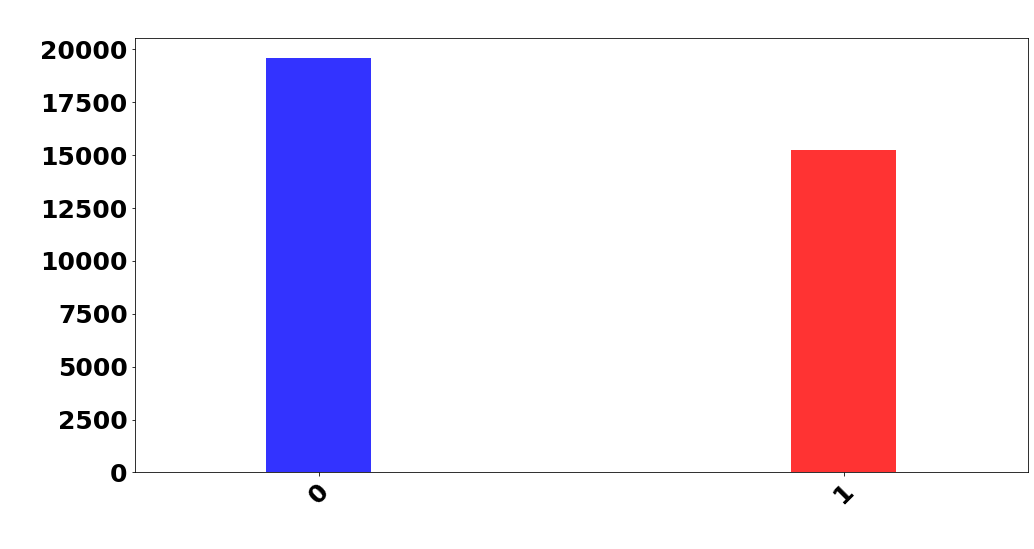

In [138]:
#Configurando os parâmetros da Figura.
plt.figure(figsize=(16, 8))


#Plotando Gráfico com Matplotlib.
df_kmeans['Cluster'].value_counts().plot(kind='bar', color=['blue', 'red'],  alpha=0.8, width=0.2)


#Plotando Gráfico com Searborn.

#Configurações para as fontes dos textos.
font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        }
plt.title('Gráfico para distribuição de Classes - Clusters', fontdict=font, color='white', size=30)

#Configurando título, labels e ticks
plt.xlabel('Meses de Coleta', fontdict=font, color='white', size=30)
plt.ylabel('Tweets Coletados', fontdict=font, color='white', size=30)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=25, color='black', weight="bold")
plt.yticks(size=25, color='black', weight="bold")

#Exibindo a figura.
plt.savefig('grafico.png', format='png', quality=100)
plt.show()

In [139]:
#Verificando os clusters únicos.
df_kmeans['Cluster'].unique()

array([1, 0], dtype=int32)

In [140]:
#Criando Vocabulário em formato de Dicionário para o sentimento das palavras.
words = pd.DataFrame(word_vectors.vocab.keys())
#Nomeando a coluna do DataFrame.
words.columns = ['words']
#Atribuindo as palavras a classe positiva ou negativa, de acordo com a clusterização.
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



*Explicação para Função Lambda que atribui um sentimento em potencial para as palavras.*

**Para atribuir uma pontuação de sentimento para cada palavra foi realizada uma multiplicação pelo quão próximos eles estavam de seu cluster (para denotar o quão potencialmente positivos / negativos os termos são). Como a pontuação que o algoritmo K-means produz é a distância de ambos os clusters, para ponderá-los corretamente, foi feita a multiplicação pelo inverso da pontuação de proximidade (divisão da pontuação de sentimento pela pontuação de proximidade).**

In [141]:
#Para o cluster 0 atribuiu-se o sentimento como positivo e para o outro cluster atribuiu-se o sentimento negativo.
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [142]:
words.head(5)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,pesquisadores,"[0.01309748, 0.013059459, 0.025918674, 0.05150...",1,-1,1.093463,-1.093463
1,desenvolvem,"[0.007687092, 0.0098064635, 0.0003051673, 0.04...",1,-1,1.150589,-1.150589
2,tecido,"[0.018008847, 0.019749463, 0.0019298695, 0.048...",1,-1,1.102921,-1.102921
3,neutraliza,"[-0.006309328, 0.017010897, 0.00776734, 0.0454...",1,-1,1.245996,-1.245996
4,novo,"[-0.006984616, -0.0068734093, -0.030675316, 0....",1,-1,1.177783,-1.177783


In [143]:
words.shape

(34803, 6)

In [144]:
words.describe()['sentiment_coeff']

count    34803.000000
mean         0.923475
std          3.411624
min         -5.851744
25%         -2.203577
50%          1.570374
75%          3.733383
max         10.650852
Name: sentiment_coeff, dtype: float64

In [145]:
#Importando Módulo da biblioteca Plotly,
import plotly.graph_objects as go

#Instanciando uma figura.
fig = go.Figure()

#Configurando e criando a exibição do gráfico.
fig.add_trace(go.Box(y=words['sentiment_coeff'], name='Score de Sentimento', marker_color = 'black'))

#Configurando o Layout a ser exibido.
fig.update_layout(width=700, height=700)

#Exibindo imagem.
fig.show()

In [146]:
words[['words', 'sentiment_coeff']].to_csv('dicionario_sentimentos.csv', index=False)

# Aplicando Métricas

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [147]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

In [148]:
silhouette_score(word_vectors.vectors, model.labels_)

0.18197033

In [149]:
metrics.calinski_harabasz_score(word_vectors.vectors, labels)

7151.036230037903

In [150]:
davies_bouldin_score(word_vectors.vectors, labels)

1.9808006807698706